WBCD Dataset Neural Network 

### Import Libraries

In [1]:
import mlrose

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

### Import more Libraries


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from textwrap import wrap

### Load Dataset

In [3]:
RANDOM_SEED = 25


columns = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness',
           'Concavity','Concave_Points','Symmetry','Fractal_Dimension',
           'Malignant/Benign']

# Read CSV file into pandas df
df = pd.read_csv('../datasets/breast_cancer/breast-cancer-wisconsin.csv',
                 delimiter=',', quotechar='"', names=columns)

### Dataframe without Preprocessing 

In [4]:
print("Printing dataframe head (without any preprocessing)....")
print(df.head(10))

Printing dataframe head (without any preprocessing)....
    Radius  Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
0  1000025        5          1     1           1            2         1   
1  1002945        5          4     4           5            7        10   
2  1015425        3          1     1           1            2         2   
3  1016277        6          8     8           1            3         4   
4  1017023        4          1     1           3            2         1   
5  1017122        8         10    10           8            7        10   
6  1018099        1          1     1           1            2        10   
7  1018561        2          1     2           1            2         1   
8  1033078        2          1     1           1            2         1   
9  1033078        4          2     1           1            2         1   

   Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
0               3         1                  1     

### Dataset Preprocessing 

In [5]:
# Shuffle
df = shuffle(df, random_state=RANDOM_SEED)

# DROP USELESS ROWS AND COLUMNS
df.dropna(inplace=True)
cols = [0]
# Drop ID column (it's not attribute or target)
df.drop(df.columns[cols],axis=1,inplace=True)
# Drop all data points with missing variables  (denoted by '?' entry)
nostrings_row_list = [x.isdigit() for x in df.iloc[:,5]]
df = df[nostrings_row_list]


# Handle categorical data
# df = pd.get_dummies(df)


# Split data into X and y vectors
X = df.ix[:, df.columns != 'Malignant/Benign']
y = df['Malignant/Benign']

# Change 2 -> 0 (benign) and 4 -> 1 (malignant)
y.replace(2, 0, inplace=True)
y.replace(4, 1, inplace=True)

/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


### Sanity Check on Dataframe 

In [6]:
print("Sanity Check: Printing out dataframe and shape after preprocessing... ")
print(df.head(10))
print("df.shape: ", df.shape)


Sanity Check: Printing out dataframe and shape after preprocessing... 
     Texture  Perimeter  Area  Smoothness  Compactness Concavity  \
437        4          1     1           1            2         1   
511        5          1     1           1            2         1   
215        8          7     8           7            5         5   
684        1          1     1           1            2         1   
302       10         10    10           7            9        10   
341        1          1     1           1            2         1   
608        5         10    10          10           10        10   
366        6         10    10          10            8        10   
205        5         10    10           9            6        10   
270        8          4     7           1            3        10   

     Concave_Points  Symmetry  Fractal_Dimension  Malignant/Benign  
437               1         1                  1                 0  
511               2         1             

### Training and Testing Split, Scaling 

In [7]:
# Split into 30%  training data, 70% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=RANDOM_SEED)


# Apply scaling. Large values of certain features undesireable for NN
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/home/saksham/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/home/saksham/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


### Sanity Check on X_train

In [8]:
print("Sanity Check: Printing out X_train... ")
print(X_train[:4])
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


Sanity Check: Printing out X_train... 
[[ 0.21607913  0.26729122  0.89900862  1.44426357  2.63187492  0.94645923
   1.85978038  2.25742091 -0.34434076]
 [-0.1425522   1.54175711  1.22554822  2.47980054  0.356122    1.76653327
   1.45180653  0.66496637 -0.34434076]
 [ 2.00923577 -0.36994172 -0.4071498  -0.62681039 -0.55417916  0.67310122
  -0.99603658 -0.60899726  0.20067541]
 [-1.21844619 -0.68855819 -0.7336894  -0.62681039 -1.00932974 -0.69368885
  -0.99603658 -0.60899726 -0.34434076]]
X_train.shape:  (478, 9)
X_test.shape:  (205, 9)
y_train.shape:  (478,)
y_test.shape:  (205,)


### Genetic Algorithm Hyperparameter Testing Code - Mutation  Probability 

In [35]:
np.random.seed(5)

MAX_ITER = 3000
max_iter = MAX_ITER 

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
mutation_probability = np.arange(0, 0.175, 0.025)
testError = []
trainError = []

# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Max Iterations", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# COMMENCE TRAINING LOOP 
for mutation_prob in mutation_probability :
    
    print("Training NN with mut_prob: ", mutation_prob)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True,
                                        pop_size=100, mutation_prob=mutation_prob,
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([max_iter, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    
    
# Store results from above into df 
result_df = pd.DataFrame(data, columns=cols)
print(result_df)
    


Training NN with mut_prob:  0.0
Training NN with mut_prob:  0.025
Training NN with mut_prob:  0.05
Training NN with mut_prob:  0.07500000000000001
Training NN with mut_prob:  0.1
Training NN with mut_prob:  0.125
Training NN with mut_prob:  0.15000000000000002
Training NN with mut_prob:  0.17500000000000002
   Max Iterations  training accuracy  testing accuracy  training MSE  \
0            3000           0.345188          0.360976      0.654812   
1            3000           0.631799          0.595122      0.368201   
2            3000           0.654812          0.639024      0.345188   
3            3000           0.654812          0.639024      0.345188   
4            3000           0.654812          0.639024      0.345188   
5            3000           0.345188          0.360976      0.654812   
6            3000           0.654812          0.639024      0.345188   
7            3000           0.654812          0.639024      0.345188   

   testing MSE  
0     0.639024  
1     0.

### Plot it out (Genetic Alg Hyperparameter Testing) - Mutation Probability

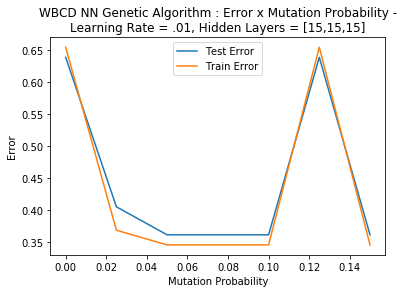

In [39]:
plt.figure()
title = "WBCD NN Genetic Algorithm : Error x Mutation Probability - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(mutation_probability[:-1], testError[:-1], '-', label='Test Error')
plt.plot(mutation_probability[:-1], trainError[:-1], '-', label='Train Error')
plt.legend()
plt.xlabel('Mutation Probability')
plt.ylabel('Error')
filename = 'WBCD_GA_Hyperparameters_MutationProb.png'
plt.savefig("../plots/" + filename)

### Genetic Algorithm Hyperparameter Testing Code - Population Size


In [31]:
np.random.seed(23)

MAX_ITER = 3000
max_iter = MAX_ITER 

hidden_node_architecture = [15, 15, 15]

# Lists to hold values for x and y axes 
population_list = list()
testError = []
trainError = []

# Create list to hold data on each trial
data = []
# Columns for df we'll create after loop 
cols = ["Population Size", "training accuracy", "testing accuracy", "training MSE", "testing MSE"]

# COMMENCE TRAINING LOOP 
for pop in range(20, 181, 20) :
    
    print("Training NN with population: ", pop)
    
    nn_sigmoid = mlrose.NeuralNetwork(hidden_nodes = hidden_node_architecture, activation = 'sigmoid', 
                                        algorithm = 'simulated_annealing', 
                                        max_iters = max_iter, bias = True, is_classifier = True, 
                                        learning_rate = 0.01, early_stopping = True,
                                        pop_size=100, mutation_prob=0.05,
                                        clip_max = 5, max_attempts = 100)

    nn_sigmoid.fit(X_train, y_train)
    
    # Prediction based on y_train and y_test 
    y_train_pred = nn_sigmoid.predict(X_train)
    y_test_pred = nn_sigmoid.predict(X_test)
    
    # MSE Values 
    train_err = mean_squared_error(y_train,
                        y_train_pred)
    test_err = mean_squared_error(y_test,
                        y_test_pred) 

    # Accuracy Values
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    data.append([pop, y_train_accuracy, y_test_accuracy, train_err, test_err])
    
    
    # Append data to lists
    testError.append(test_err)
    trainError.append(train_err)
    population_list.append(pop)
    
    
# Store results from above into df 
result_df = pd.DataFrame(data, columns=cols)
print(result_df)
    


Training NN with population:  20
Training NN with population:  40
Training NN with population:  60
Training NN with population:  80
Training NN with population:  100
Training NN with population:  120
Training NN with population:  140
Training NN with population:  160
Training NN with population:  180
   Population Size  training accuracy  testing accuracy  training MSE  \
0               20           0.654812          0.639024      0.345188   
1               40           0.654812          0.639024      0.345188   
2               60           0.345188          0.360976      0.654812   
3               80           0.654812          0.639024      0.345188   
4              100           0.711297          0.692683      0.288703   
5              120           0.654812          0.639024      0.345188   
6              140           0.523013          0.541463      0.476987   
7              160           0.815900          0.843902      0.184100   
8              180           0.654812    

### Plot it out (Genetic Alg Hyperparameter Testing) - Population Size 

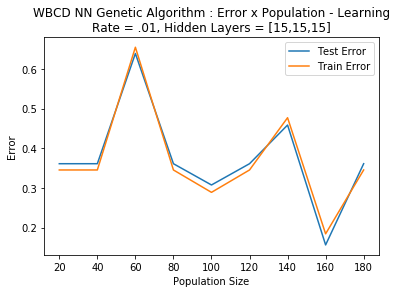

In [32]:
plt.figure()
title = "WBCD NN Genetic Algorithm : Error x Population - Learning Rate = .01, Hidden Layers = [15,15,15]"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(population_list, testError, '-', label='Test Error')
plt.plot(population_list, trainError, '-', label='Train Error')
plt.legend()
plt.xlabel('Population Size')
plt.ylabel('Error')
filename = 'WBCD_GA_Hyperparameters_PopSize_Seed23.png'
plt.savefig("../plots/" + filename)